In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

df = pd.read_csv("./data/train_clean.csv")

df.tail(2)

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
16881,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,10/20/2015,None,...,4/29/2016,2016 - 4,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost
16882,28318,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,9/3/2015,None,...,8/31/2016,2016 - 7,Q3,2016,40,USD,25603200.00,USD,0.0,Closed Lost


In [251]:
dataMes = {'mes':range(1,13,1),
           'Mes':['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio',
                        'Agosto','Septiembre','Octubre','Noviembre','Diciembre']}
dfMes = pd.DataFrame(data=dataMes)

In [252]:
# relleno campos de Territory con Nones por su Region
df = df.replace( 'None' , pd.NA )
df['Territory'].fillna(df['Region'], inplace=True)
df

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,...,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage
0,27761,EMEA,EMEA,1,1,1,1,Bureaucratic_Code_4,6/16/2015,<NA>,...,6/30/2016,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost
1,27760,EMEA,EMEA,0,0,0,0,Bureaucratic_Code_4,6/16/2015,<NA>,...,1/20/2016,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,1/25/2016,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,3/31/2018,2018 - 2,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,2/28/2018,2018 - 2,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,3/25/2016,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16879,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,4/8/2016,2016 - 4,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won
16880,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,1/15/2016,Source_7,...,3/31/2016,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won
16881,28561,Americas,NE America,1,1,1,1,Bureaucratic_Code_4,10/20/2015,<NA>,...,4/29/2016,2016 - 4,Q2,2016,4,USD,2346796.88,USD,0.0,Closed Lost


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text yticklabel objects>)

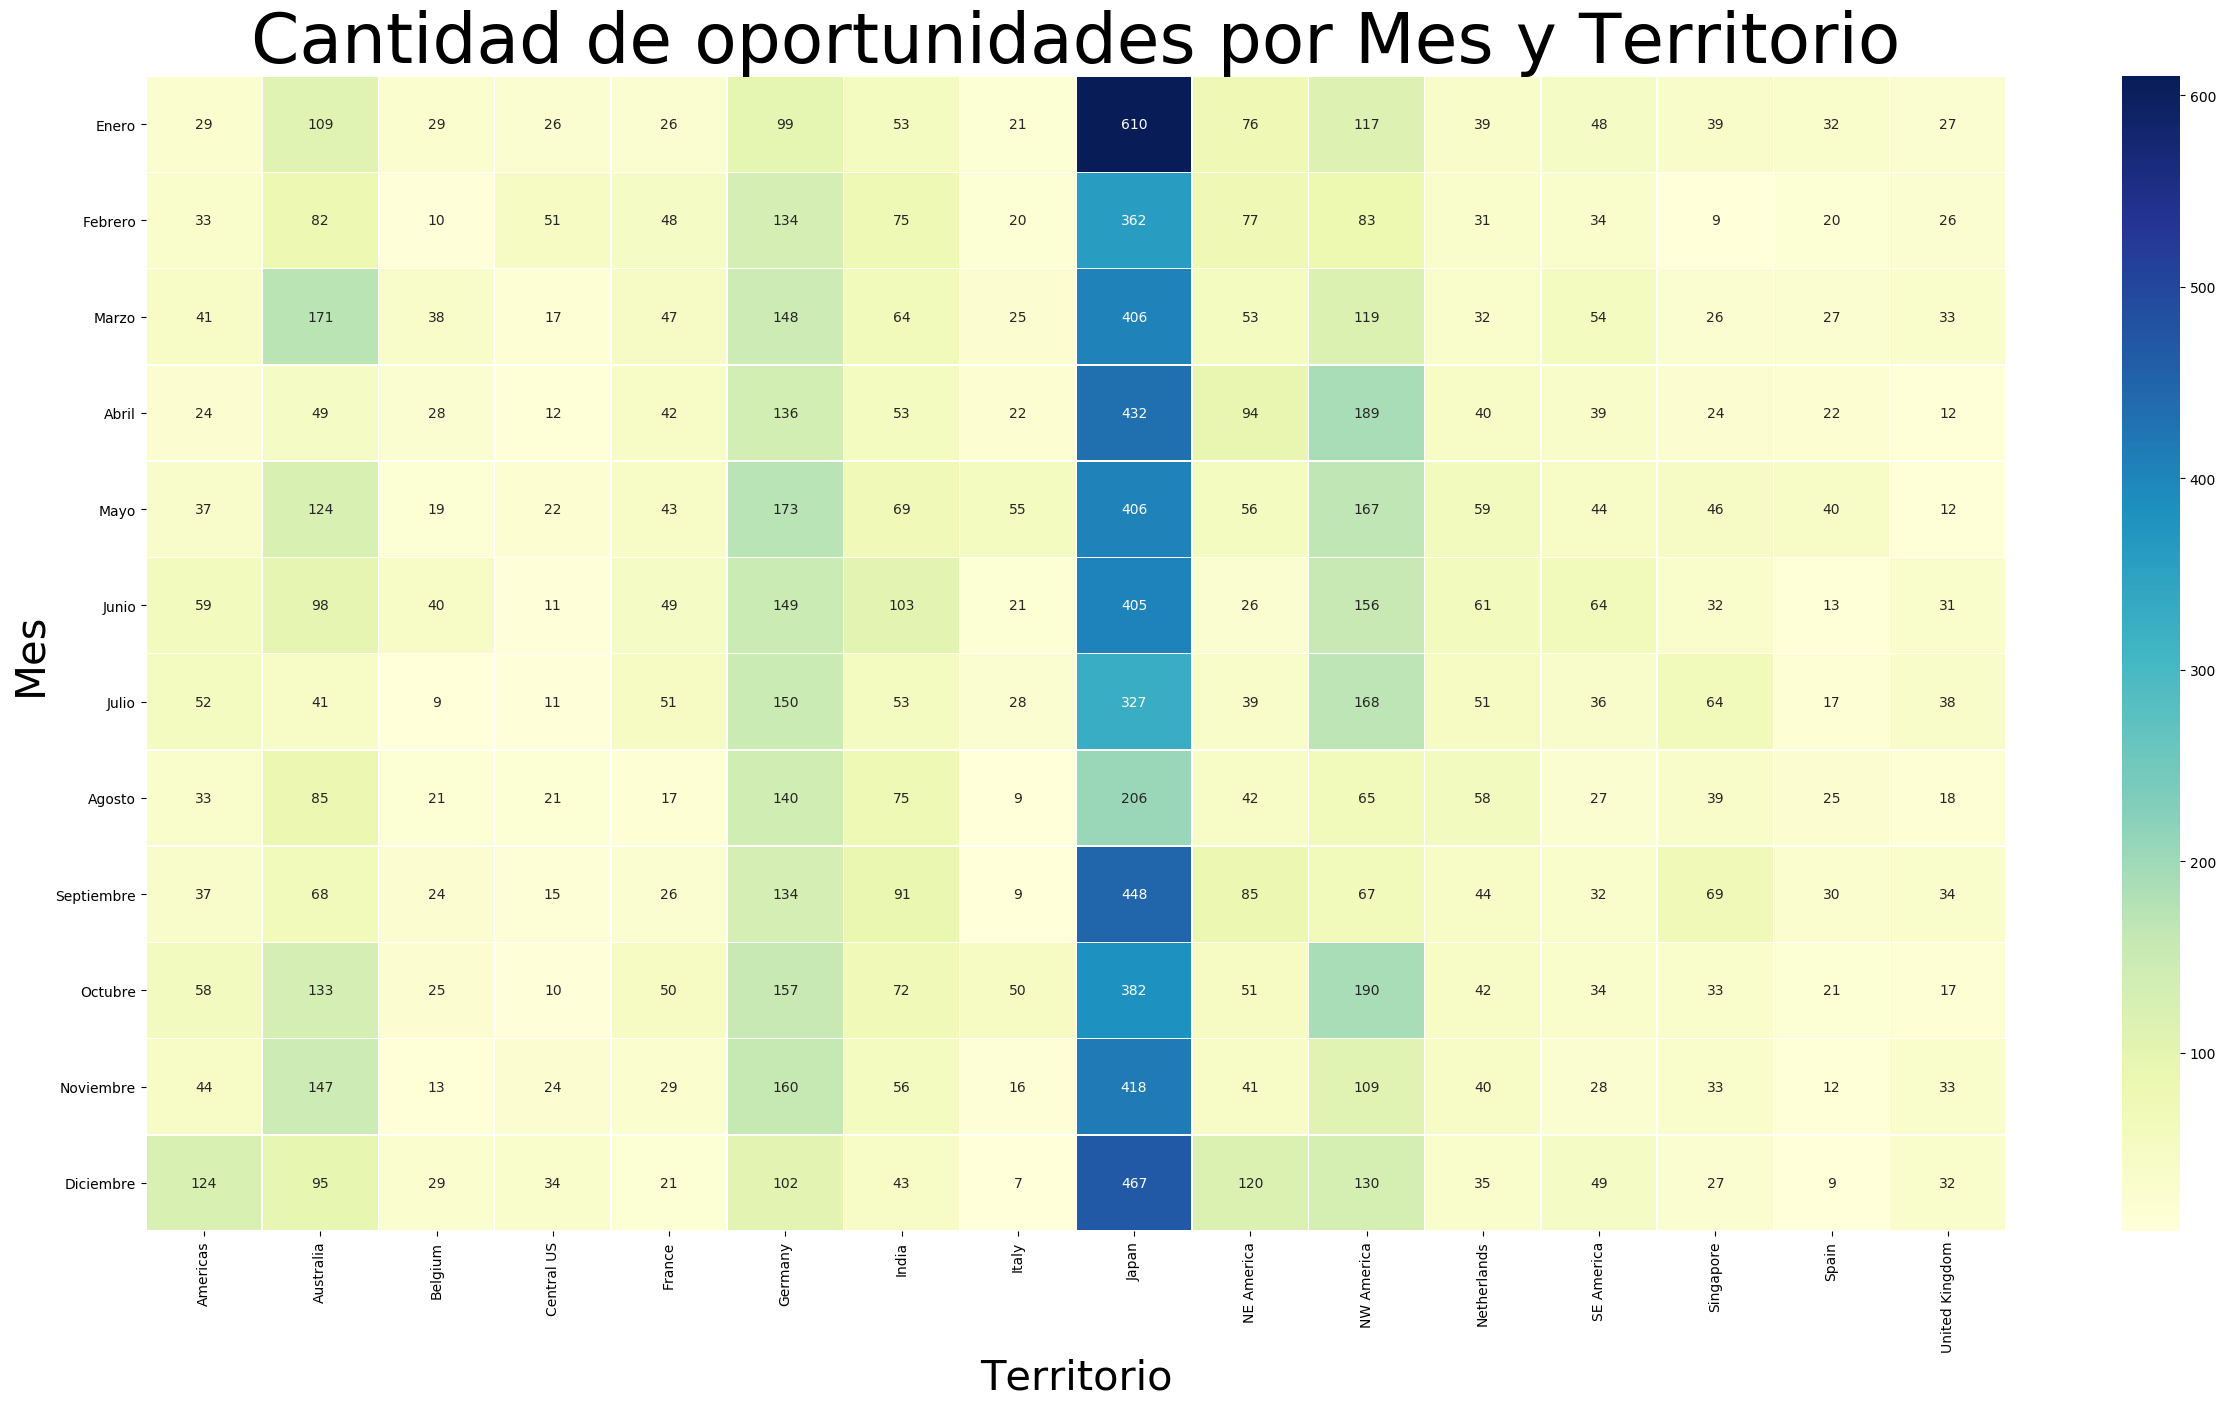

In [253]:
aux = df.groupby(['Territory']).size().reset_index(name='cant')
aux = aux.loc[aux.cant>aux.cant.mean()]
df['mes'] = pd.DatetimeIndex(df.Opportunity_Created_Date).month
aux1 = df.groupby(['Territory','mes']).size().reset_index(name='cant')\
    .merge(aux,left_on='Territory',right_on='Territory')\
    .merge(dfMes, left_on='mes', right_on='mes')

fig, ax = plt.subplots(figsize=(30,15))  
auxPivot = aux1.pivot_table(values="cant_x",columns='Territory',index='Mes')
column_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
auxPivot = auxPivot.reindex(index = column_order)
ax = sns.heatmap(auxPivot, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax.set_title('Cantidad de oportunidades por Mes y Territorio', fontsize=50) 
ax.set_xlabel('Territorio', fontsize=30) # Titulo eje y
ax.set_ylabel('Mes', fontsize=30) # Titulo eje y
plt.xticks(rotation=90)
plt.yticks(rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text xticklabel objects>)

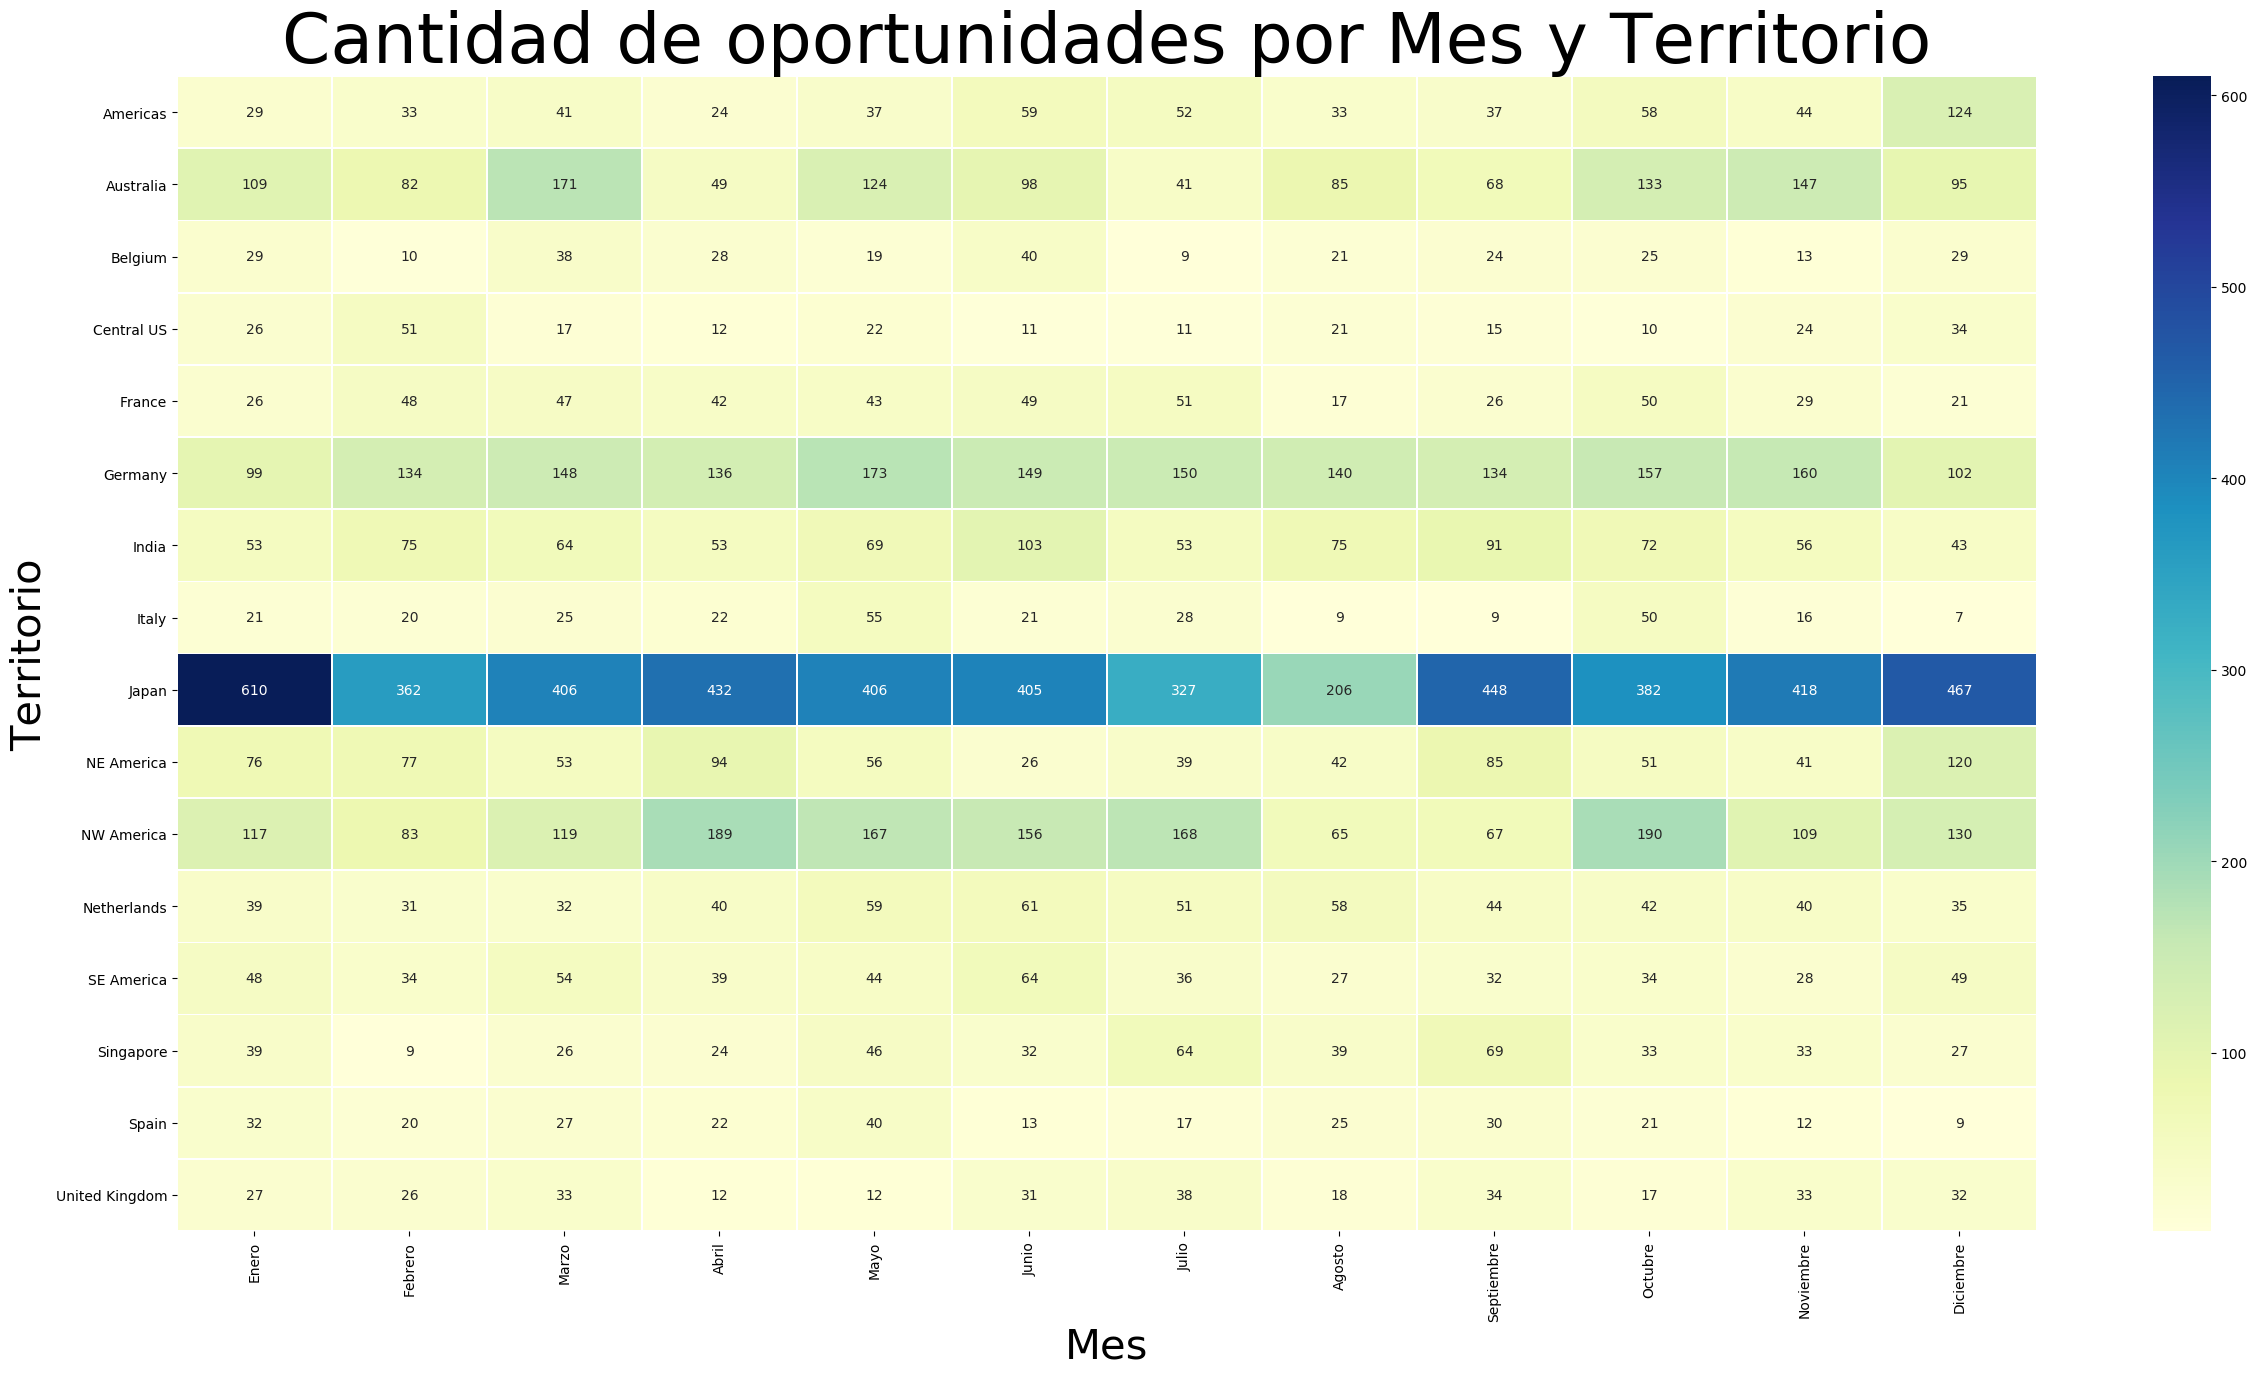

In [258]:
aux = df.groupby(['Territory']).size().reset_index(name='cant')
aux = aux.loc[aux.cant>aux.cant.mean()]
df['mes'] = pd.DatetimeIndex(df.Opportunity_Created_Date).month
aux1 = df.groupby(['Territory','mes']).size().reset_index(name='cant')\
    .merge(aux,left_on='Territory',right_on='Territory')\
    .merge(dfMes, left_on='mes', right_on='mes')
fig, ax = plt.subplots(figsize=(30,15))  
auxPivot = aux1.pivot_table(values="cant_x",columns='Mes',index='Territory')
column_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
auxPivot = auxPivot.reindex(columns = column_order)
ax = sns.heatmap(auxPivot, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax.set_title('Cantidad de oportunidades por Mes y Territorio', fontsize=50) 
ax.set_ylabel('Territorio', fontsize=30) # Titulo eje y
ax.set_xlabel('Mes', fontsize=30) # Titulo eje y
plt.xticks(rotation=90)

In [237]:
df_won = df[df['Stage'] == 'Closed Won']
df_won.shape

(9533, 48)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 <a list of 12 Text yticklabel objects>)

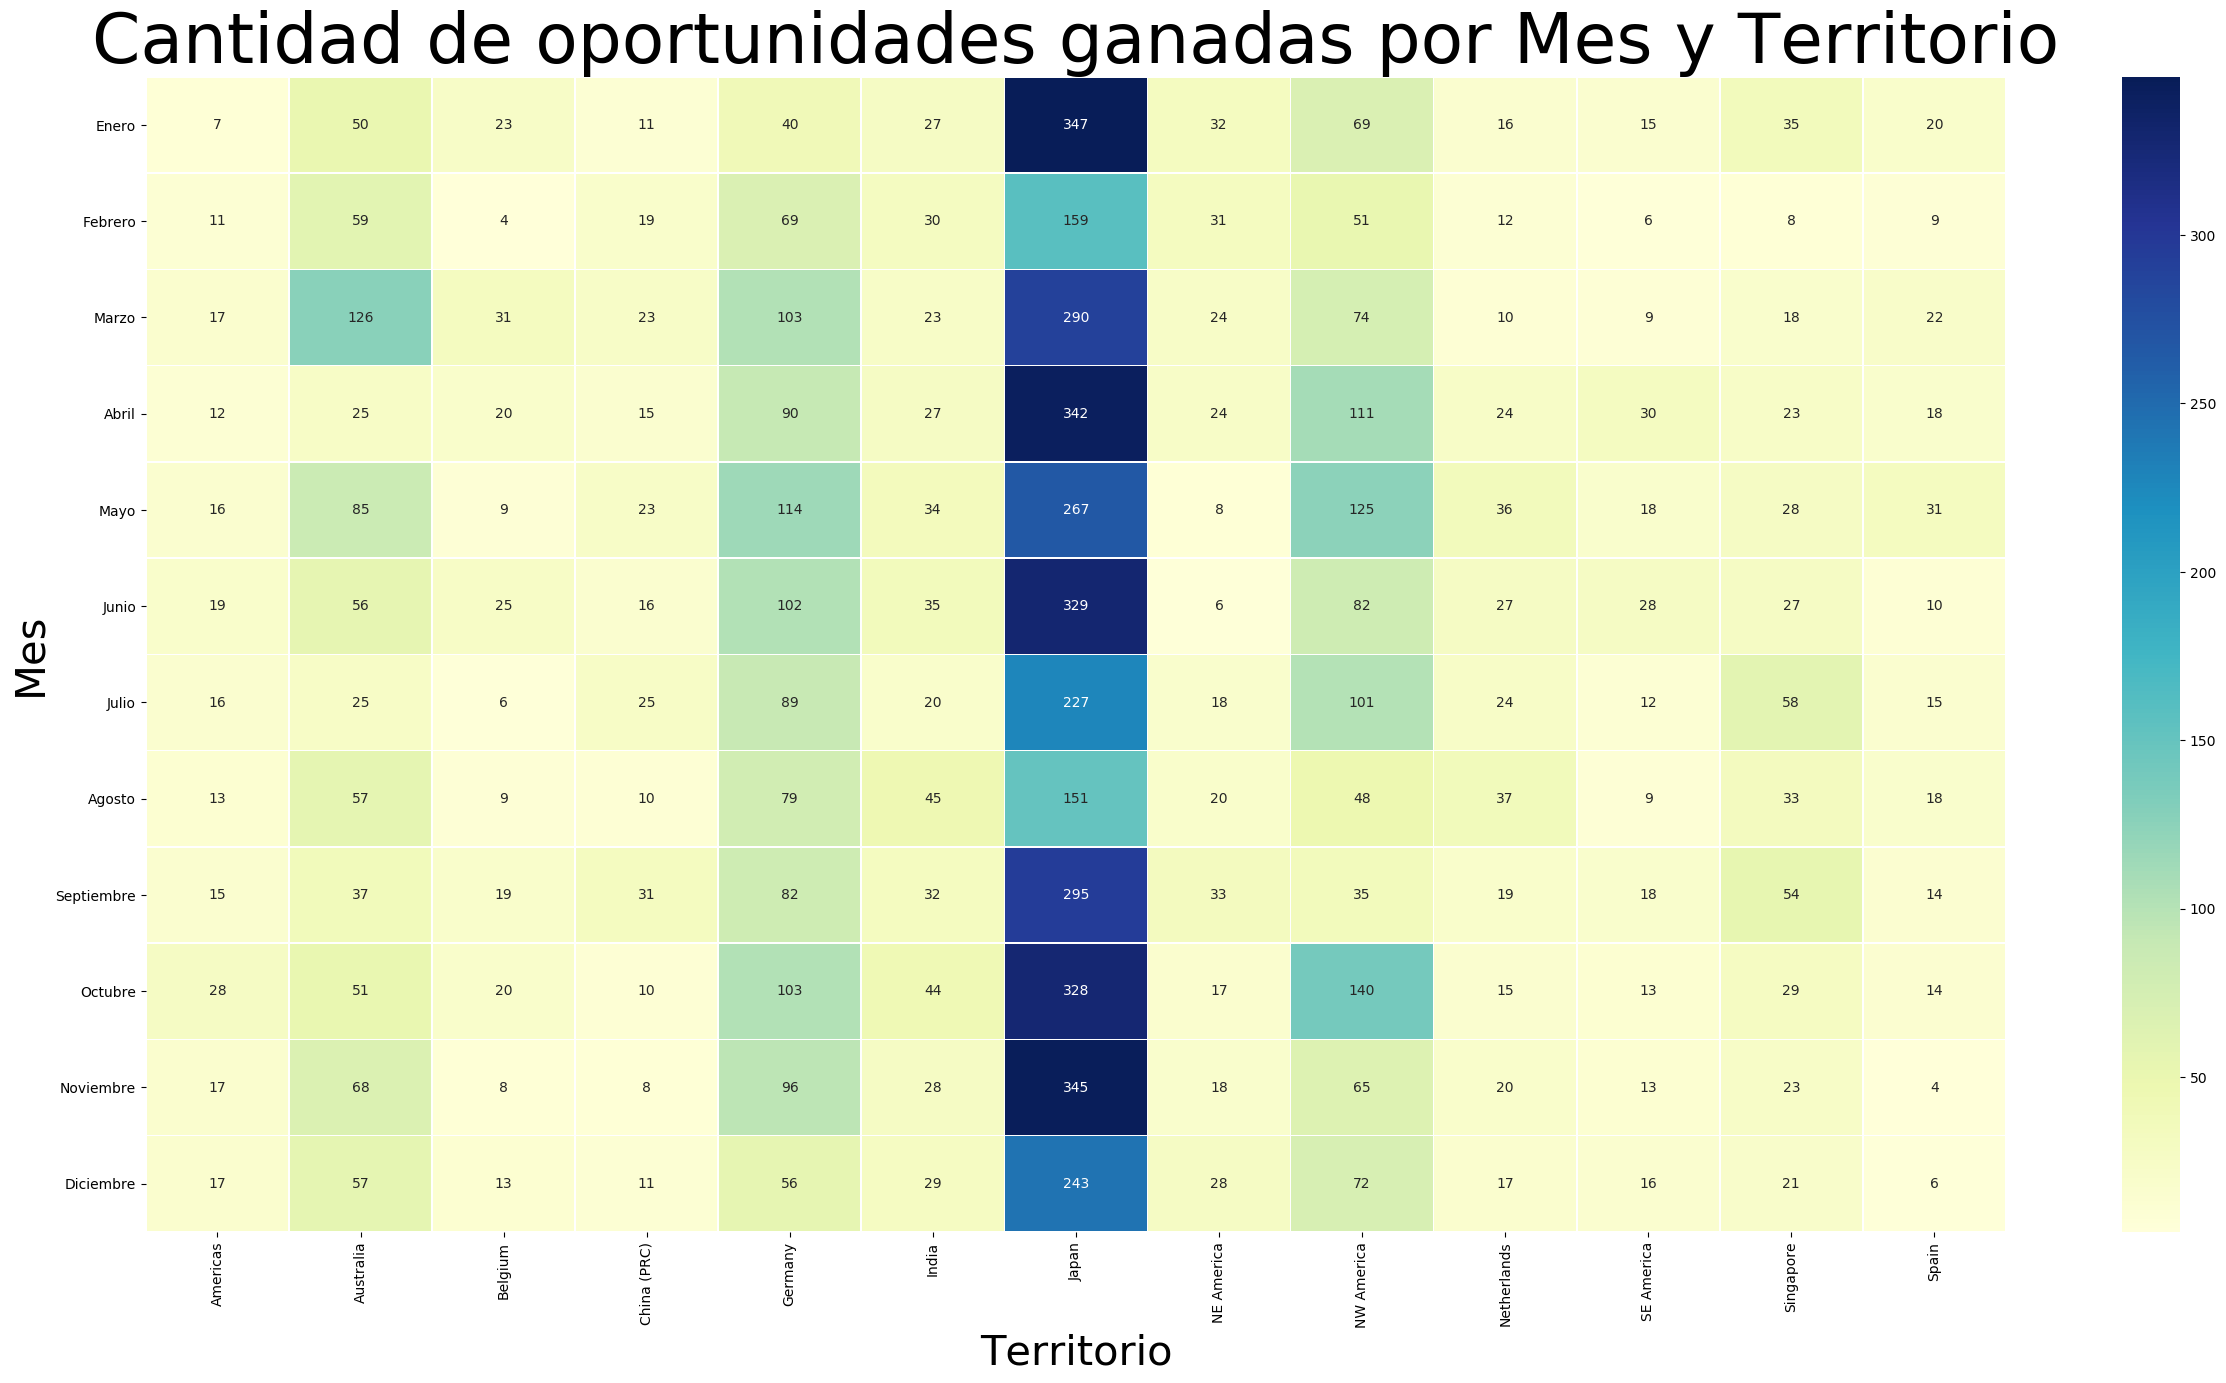

In [285]:
aux = df_won.groupby(['Territory']).size().reset_index(name='cant')
aux = aux.loc[aux.cant>aux.cant.mean()]
aux1 = df_won.groupby(['Territory','mes']).size().reset_index(name='cant')\
    .merge(aux,left_on='Territory',right_on='Territory')\
    .merge(dfMes, left_on='mes', right_on='mes')

fig, ax = plt.subplots(figsize=(30,15))  
auxPivot = aux1.pivot_table(values="cant_x",columns='Territory',index='Mes')
column_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
auxPivot = auxPivot.reindex(index = column_order)
ax = sns.heatmap(auxPivot, annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
ax.set_title('Cantidad de oportunidades ganadas por Mes y Territorio', fontsize=50) 
ax.set_xlabel('Territorio', fontsize=30) # Titulo eje y
ax.set_ylabel('Mes', fontsize=30) # Titulo eje y
plt.xticks(rotation=90)
plt.yticks(rotation=0)

In [289]:
auxPivot

Territory,Americas,Australia,Belgium,China (PRC),Germany,India,Japan,NE America,NW America,Netherlands,SE America,Singapore,Spain
Mes,,,,,,,,,,,,,
Enero,7,50,23,11,40,27,347,32,69,16,15,35,20
Febrero,11,59,4,19,69,30,159,31,51,12,6,8,9
Marzo,17,126,31,23,103,23,290,24,74,10,9,18,22
Abril,12,25,20,15,90,27,342,24,111,24,30,23,18
Mayo,16,85,9,23,114,34,267,8,125,36,18,28,31
Junio,19,56,25,16,102,35,329,6,82,27,28,27,10
Julio,16,25,6,25,89,20,227,18,101,24,12,58,15
Agosto,13,57,9,10,79,45,151,20,48,37,9,33,18
Septiembre,15,37,19,31,82,32,295,33,35,19,18,54,14


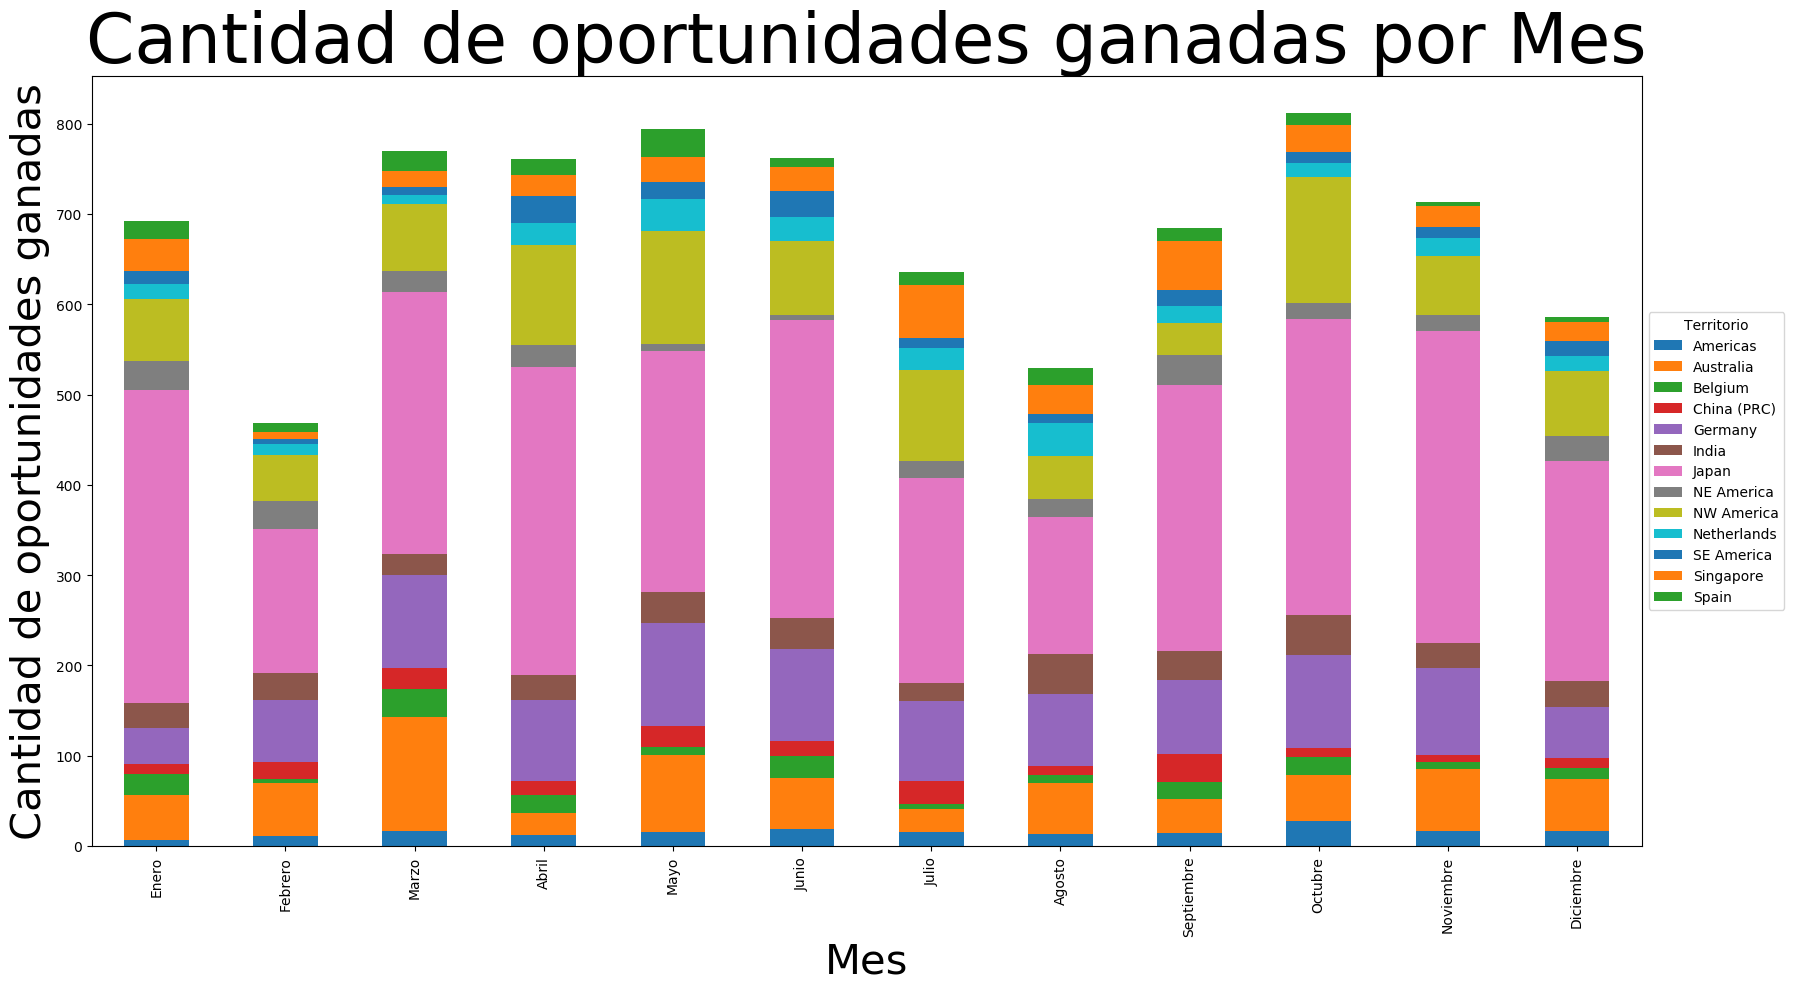

In [305]:
auxPivot.plot.bar(stacked=True, legend = True, )
plt.title('Cantidad de oportunidades ganadas por Mes', fontsize=50) 
plt.xlabel("Mes", fontsize=30)
plt.ylabel("Cantidad de oportunidades ganadas", fontsize=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title = 'Territorio')

In [238]:
df_lost = df[df['Stage'] == 'Closed Lost']
df_lost.shape

(7350, 48)

In [241]:
aux_won = df_won.groupby(['Territory']).size().reset_index(name='cant')
aux_won = aux_won[aux_won['Territory'].isin(aux['Territory'])]
aux_won.shape

(16, 2)

In [264]:
aux_won = df_won.groupby(['Territory']).size().reset_index(name='cant')
aux_won = aux_won[aux_won['Territory'].isin(aux['Territory'])]
aux1_won = df_won.groupby(['Territory','mes']).size().reset_index(name='cant')\
    .merge(aux_won,left_on='Territory',right_on='Territory')\
    .merge(dfMes, left_on='mes', right_on='mes')
aux_won_pivot = aux1_won.pivot_table(values="cant_x",columns='Mes',index='Territory')
column_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
aux_won_pivot = aux_won_pivot.reindex(columns = column_order)
aux_won_pivot

Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Territory,,,,,,,,,,,,
Americas,7.0,11.0,17.0,12.0,16.0,19.0,16.0,13.0,15.0,28.0,17.0,17.0
Australia,50.0,59.0,126.0,25.0,85.0,56.0,25.0,57.0,37.0,51.0,68.0,57.0
Belgium,23.0,4.0,31.0,20.0,9.0,25.0,6.0,9.0,19.0,20.0,8.0,13.0
Central US,14.0,7.0,NaN,4.0,17.0,6.0,6.0,12.0,7.0,4.0,6.0,21.0
France,9.0,16.0,12.0,9.0,22.0,12.0,14.0,1.0,9.0,15.0,15.0,9.0
Germany,40.0,69.0,103.0,90.0,114.0,102.0,89.0,79.0,82.0,103.0,96.0,56.0
India,27.0,30.0,23.0,27.0,34.0,35.0,20.0,45.0,32.0,44.0,28.0,29.0
Italy,8.0,8.0,12.0,16.0,32.0,9.0,18.0,5.0,4.0,27.0,6.0,4.0
Japan,347.0,159.0,290.0,342.0,267.0,329.0,227.0,151.0,295.0,328.0,345.0,243.0


In [265]:
aux_lost = df_lost.groupby(['Territory']).size().reset_index(name='cant')
aux_lost = aux_lost[aux_lost['Territory'].isin(aux['Territory'])]
aux1_lost = df_lost.groupby(['Territory','mes']).size().reset_index(name='cant')\
    .merge(aux_lost,left_on='Territory',right_on='Territory')\
    .merge(dfMes, left_on='mes', right_on='mes')
aux_lost_pivot = aux1_lost.pivot_table(values="cant_x",columns='Mes',index='Territory')
column_order = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
aux_lost_pivot = aux_lost_pivot.reindex(columns = column_order)
aux_lost_pivot

Mes,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
Territory,,,,,,,,,,,,
Americas,22,22,24,12,21,40,36,20,22,30,27,107
Australia,59,23,45,24,39,42,16,28,31,82,79,38
Belgium,6,6,7,8,10,15,3,12,5,5,5,16
Central US,12,44,17,8,5,5,5,9,8,6,18,13
France,17,32,35,33,21,37,37,16,17,35,14,12
Germany,59,65,45,46,59,47,61,61,52,54,64,46
India,26,45,41,26,35,68,33,30,59,28,28,14
Italy,13,12,13,6,23,12,10,4,5,23,10,3
Japan,263,203,116,90,139,76,100,55,153,54,73,224


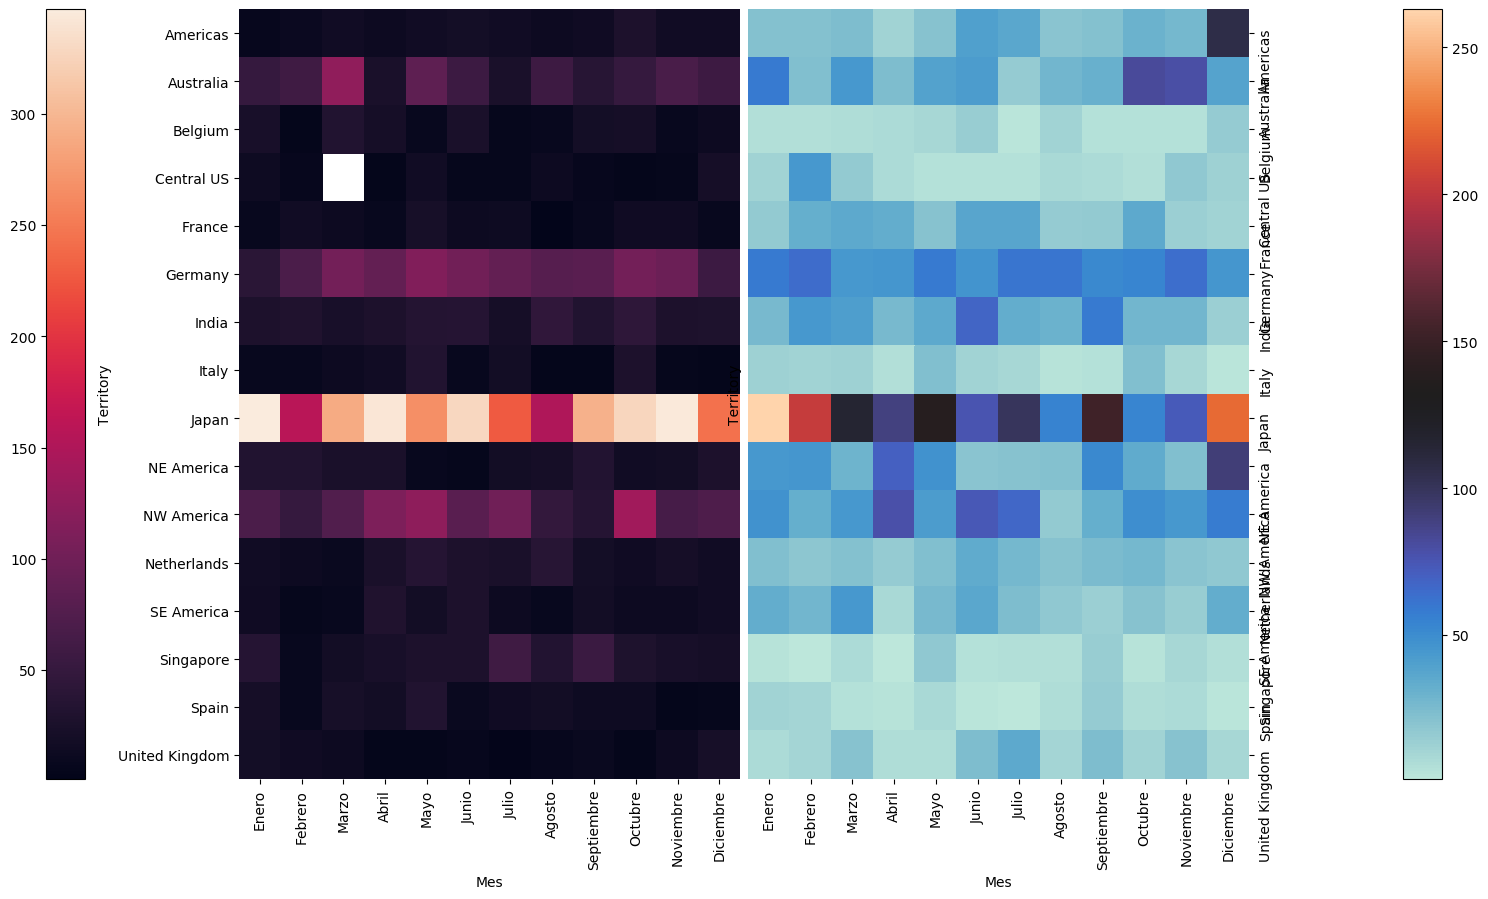

In [271]:
fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(aux_won_pivot, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(aux_lost_pivot, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
#ax.tick_params(rotation= 90)
#ax2.tick_params(rotation= 90)
plt.xticks(rotation=90)
plt.show()

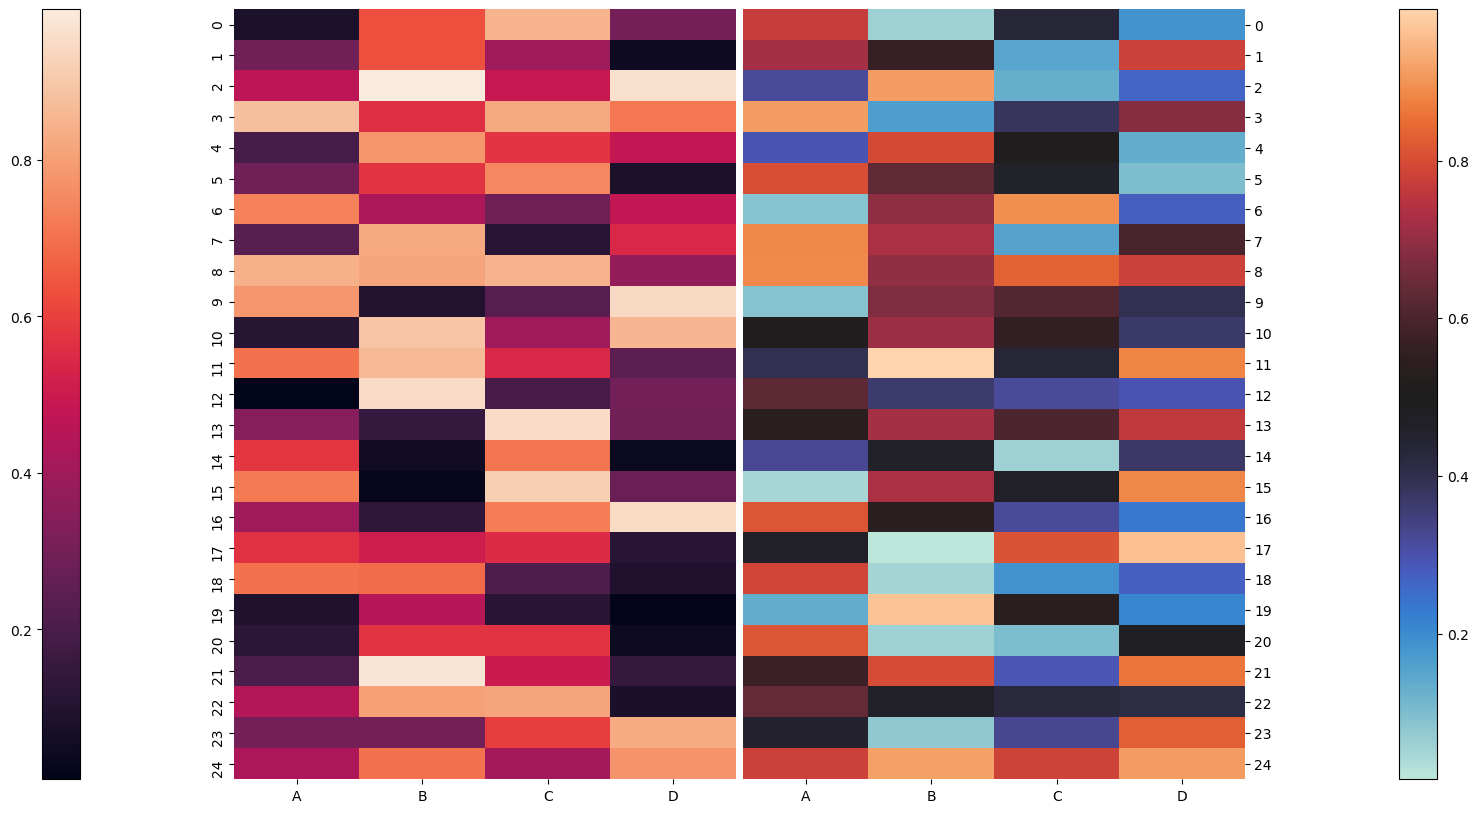

In [186]:
df4 =  pd.DataFrame(np.random.rand(25,4), columns=list("ABCD"))
df5 = pd.DataFrame(np.random.rand(25,4), columns=list("ABCD"))

fig, (ax,ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df4, cmap="rocket", ax=ax, cbar=False)
fig.colorbar(ax.collections[0], ax=ax,location="left", use_gridspec=False, pad=0.2)
sns.heatmap(df5, cmap="icefire", ax=ax2, cbar=False)
fig.colorbar(ax2.collections[0], ax=ax2,location="right", use_gridspec=False, pad=0.2)
ax2.yaxis.tick_right()
ax2.tick_params(rotation=0)
plt.show()

In [187]:
df4

,A,B,C,D
0,0.080484,0.628361,0.847096,0.303245
1,0.289851,0.632232,0.397303,0.039729
2,0.464777,0.992486,0.485801,0.963309
3,0.880379,0.561462,0.821217,0.714773
4,0.192741,0.777843,0.576426,0.478689
5,0.295452,0.572517,0.746838,0.081215
6,0.731755,0.430591,0.281656,0.480429
7,0.236081,0.823615,0.113721,0.546304
8,0.846023,0.813225,0.848496,0.374128
9,0.783843,0.096124,0.238612,0.944381
